In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [148]:
path = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/15_Feature_Selection/1_Correlation/'
file = 'Breast Cancer Wisconsin (Diagnostic) Data Set.csv'
df = pd.read_csv(path + file)
print(df.shape)
df.head()

(569, 33)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [120]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# EDA & feature engineering

## Imbalance y?

In [155]:
df.groupby(by=['diagnosis'])['diagnosis'].describe()

count unique top freq
diagnosis                      
B           357      1   B  357
M           212      1   M  212

In [165]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)



# Remove NAN

In [170]:
df.isnull().sum()
df.drop('Unnamed: 32', inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Compute correlation matrix
This correlation_matrix will be a square matrix where each element (i, j) represents the correlation coefficient between feature i and feature j.

In [127]:
dfcorr = df.drop(['id','diagnosis'], axis=1).corr()
dfcorr.head()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean         1.000000      0.323782        0.997855   0.987357   
texture_mean        0.323782      1.000000        0.329533   0.321086   
perimeter_mean      0.997855      0.329533        1.000000   0.986507   
area_mean           0.987357      0.321086        0.986507   1.000000   
smoothness_mean     0.170581     -0.023389        0.207278   0.177028   

                 smoothness_mean  compactness_mean  concavity_mean  \
radius_mean             0.170581          0.506124        0.676764   
texture_mean           -0.023389          0.236702        0.302418   
perimeter_mean          0.207278          0.556936        0.716136   
area_mean               0.177028          0.498502        0.685983   
smoothness_mean         1.000000          0.659123        0.521984   

                 concave points_mean  symmetry_mean  fractal_dimension_mean  \
radius_mean                 0.822529       0.147741               -0.311631   
texture_mean                0.293464       0.071401               -0.076437   
perimeter_mean              0.850977       0.183027               -0.261477   
area_mean                   0.823269       0.151293               -0.283110   
smoothness_mean             0.553695       0.557775                0.584792   

                 ...  radius_worst  texture_worst  perimeter_worst  \
radius_mean      ...      0.969539       0.297008         0.965137   
texture_mean     ...      0.352573       0.912045         0.358040   
perimeter_mean   ...      0.969476       0.303038         0.970387   
area_mean        ...      0.962746       0.287489         0.959120   
smoothness_mean  ...      0.213120       0.036072         0.238853   

                 area_worst  smoothness_worst  compactness_worst  \
radius_mean        0.941082          0.119616           0.413463   
texture_mean       0.343546          0.077503           0.277830   
perimeter_mean     0.941550          0.150549           0.455774   
area_mean          0.959213          0.123523           0.390410   
smoothness_mean    0.206718          0.805324           0.472468   

                 concavity_worst  concave points_worst  symmetry_worst  \
radius_mean             0.526911              0.744214        0.163953   
texture_mean            0.301025              0.295316        0.105008   
perimeter_mean          0.563879              0.771241        0.189115   
area_mean               0.512606              0.722017        0.143570   
smoothness_mean         0.434926              0.503053        0.394309   

                 fractal_dimension_worst  
radius_mean                     0.007066  
texture_mean                    0.119205  
perimeter_mean                  0.051019  
area_mean                       0.003738  
smoothness_mean                 0.499316  

[5 rows x 30 columns]

## Visualize Corr

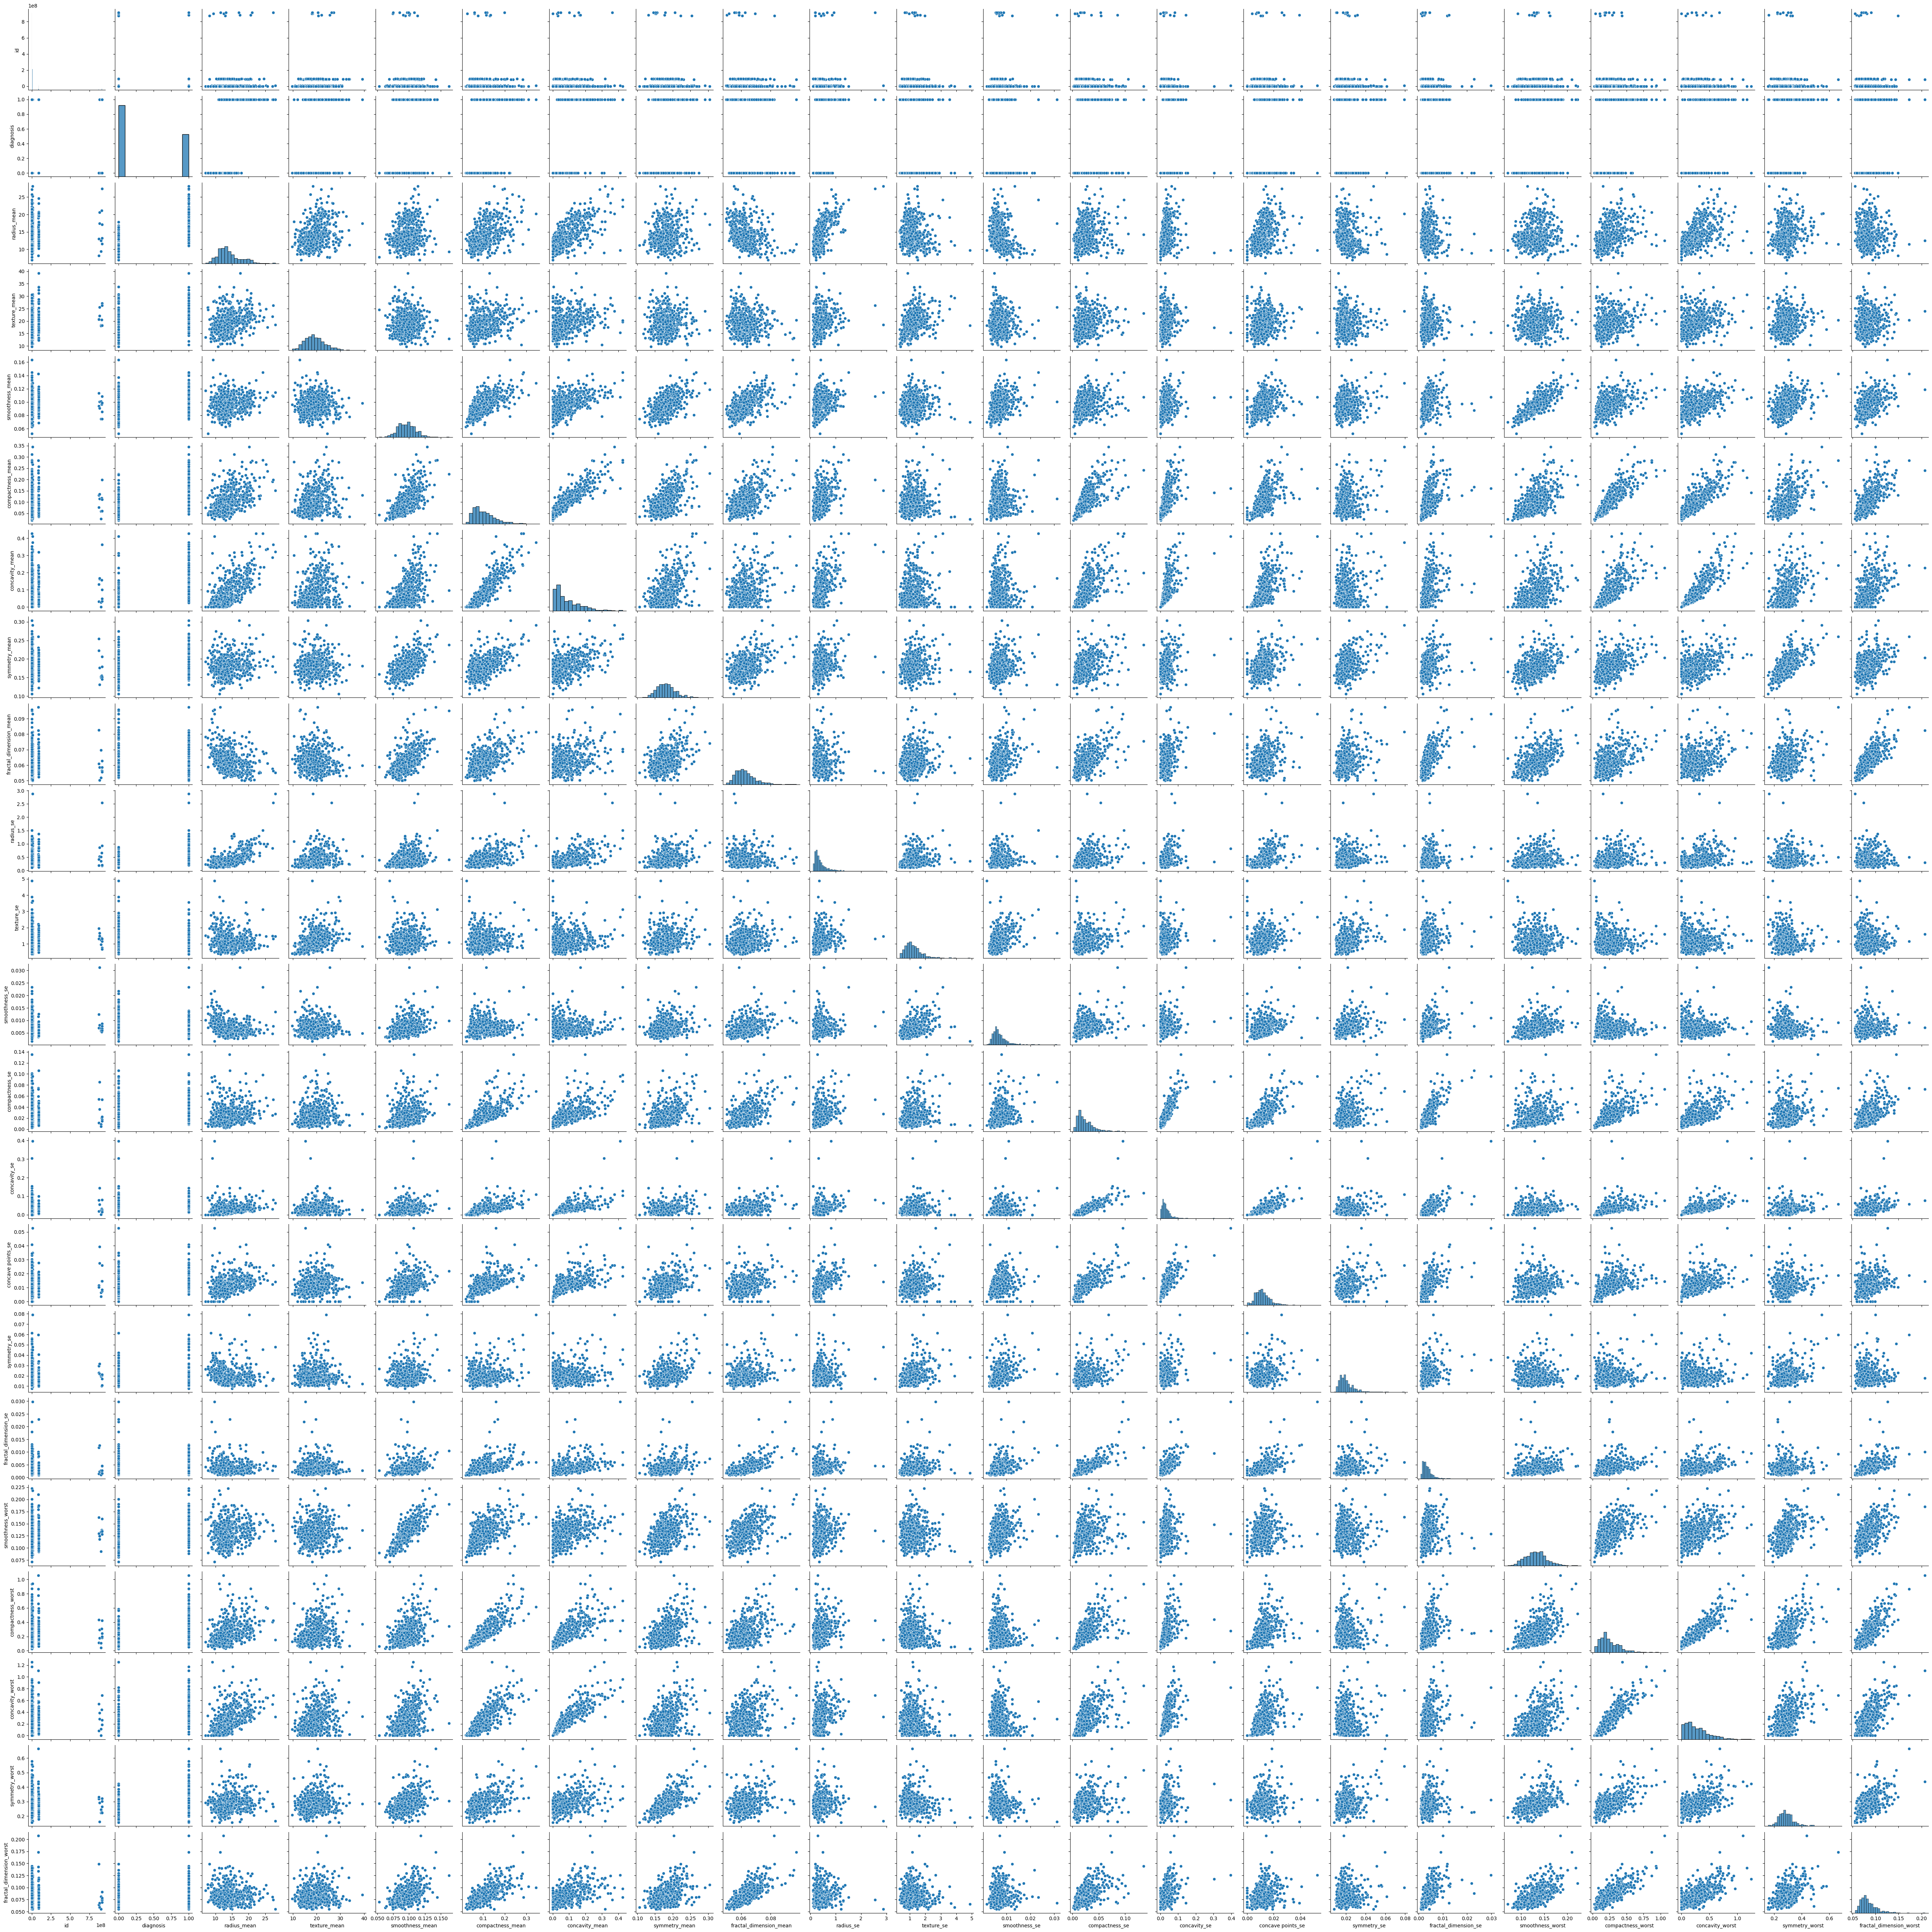

In [194]:
sns.pairplot(df1.drop(['id','diagnosis']), diag_kind='kde',corner=True)

<Axes: >

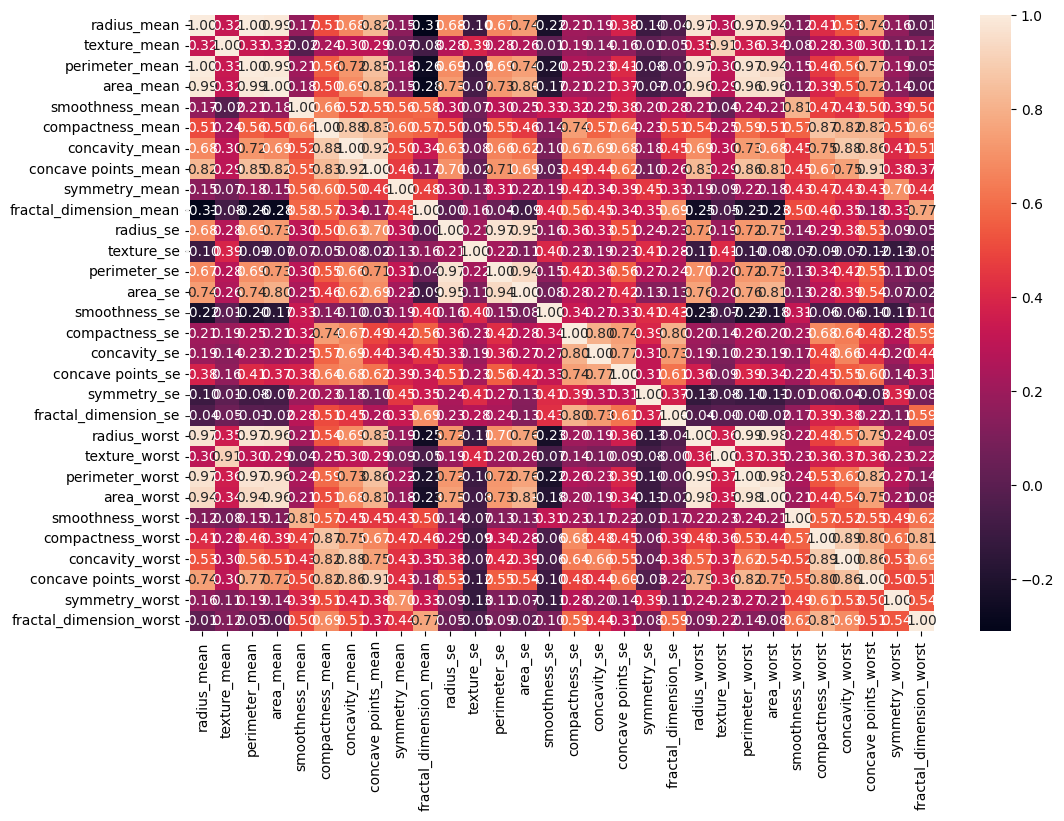

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcorr, annot=True, fmt= '.2f')

## Identify Highly Correlated Features:
Determine a threshold for correlation coefficient values beyond which features are considered highly correlated. Common thresholds range from 0.7 to 0.9, depending on your specific problem and dataset characteristics.

In [76]:
corr_pairs =[]
corr_col_list = set()
for i in range(len(dfcorr.columns)):
    # print(dfcorr.columns[i])
    for j in range(i):
        if abs(dfcorr.iloc[i,j]) >= 0.9:
            corr_pairs.append((dfcorr.columns[i], dfcorr.columns[j], dfcorr.iloc[i,j]))
            corr_col_list.add(dfcorr.columns[i])
corr_pairs


[('perimeter_mean', 'radius_mean', np.float64(0.9978552814938109)),
 ('area_mean', 'radius_mean', np.float64(0.9873571700566127)),
 ('area_mean', 'perimeter_mean', np.float64(0.9865068039913907)),
 ('concave points_mean', 'concavity_mean', np.float64(0.9213910263788588)),
 ('perimeter_se', 'radius_se', np.float64(0.9727936770160764)),
 ('area_se', 'radius_se', np.float64(0.951830112110991)),
 ('area_se', 'perimeter_se', np.float64(0.9376554069544157)),
 ('radius_worst', 'radius_mean', np.float64(0.9695389726112055)),
 ('radius_worst', 'perimeter_mean', np.float64(0.9694763634663146)),
 ('radius_worst', 'area_mean', np.float64(0.9627460860470841)),
 ('texture_worst', 'texture_mean', np.float64(0.912044588840421)),
 ('perimeter_worst', 'radius_mean', np.float64(0.9651365139559871)),
 ('perimeter_worst', 'perimeter_mean', np.float64(0.9703868870426394)),
 ('perimeter_worst', 'area_mean', np.float64(0.9591195743552645)),
 ('perimeter_worst', 'radius_worst', np.float64(0.993707916102949)),


In [78]:
print(len(corr_col_list) )
corr_col_list

10


{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

## Select Features to Retain
Generally, you would keep one of the features from each pair of highly correlated features.

In [128]:
df1 = df.drop(corr_col_list, axis =1)
print(df.shape, df1.shape)

(569, 32) (569, 22)


In [129]:
df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Train Test Split

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [132]:
X = df1.drop(['id', 'diagnosis'],axis = 1)
y = df1.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 20) (114, 20) (455,) (114,)


In [137]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Select best model

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [134]:
# define hyperparameter grid in json object of simple python dictionary
model_params = {
    'svm': {
        'model': SVC(),
        'params':{
            'C':[10],
            'kernel': ['linear','poly', 'rbf'],
            'gamma':['auto','scale']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [5,10]    
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(multi_class='auto'),
        'params':{
            'solver':['liblinear'],
            'C': [2,5]    
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params':{  
        }
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params':{ 
        }
    },
    'Decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini']
        }
    }
}

In [115]:
print(X.shape, y.shape)

(569, 20) (569,)


In [135]:
scores =[]
for model_name, model in model_params.items():
    # print(model_name, model['model'], model['params'])
    clf = GridSearchCV(model['model'], model['params'], cv =3, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_}
    )
scores

c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\linear_model\_logistic.py:124

[{'model': 'svm',
  'best_score': np.float64(0.9613292490485472),
  'best_params': {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}},
 {'model': 'random_forest',
  'best_score': np.float64(0.9279773507843684),
  'best_params': {'n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': np.float64(0.943757542003156),
  'best_params': {'C': 5, 'solver': 'liblinear'}},
 {'model': 'GaussianNB',
  'best_score': np.float64(0.9051239209133946),
  'best_params': {}},
 {'model': 'MultinomialNB',
  'best_score': np.float64(0.7680868838763576),
  'best_params': {}},
 {'model': 'Decision_tree',
  'best_score': np.float64(0.9138494384108421),
  'best_params': {'criterion': 'gini'}}]

In [139]:
model_params = {
    'svm': {
        'model': SVC(),
        'params':{
            'C':[10],
            'kernel': ['linear','poly', 'rbf'],
            'gamma':['auto','scale']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [5,10]    
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(multi_class='auto'),
        'params':{
            'solver':['liblinear'],
            'C': [2,5]    
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params':{  
        }
    },
    'Decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini']
        }
    }
}
scores =[]
for model_name, model in model_params.items():
    # print(model_name, model['model'], model['params'])
    clf = GridSearchCV(model['model'], model['params'], cv =3, return_train_score=False)
    pipe = Pipeline(
        [('scaler', StandardScaler()), 
         ('model', clf)]
        )
    
    pipe.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_}
    )
scores

c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\linear_model\_logistic.py:124

[{'model': 'svm',
  'best_score': np.float64(0.9683839227698877),
  'best_params': {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': np.float64(0.933203378817414),
  'best_params': {'n_estimators': 5}},
 {'model': 'logistic_regression',
  'best_score': np.float64(0.9666016894087069),
  'best_params': {'C': 2, 'solver': 'liblinear'}},
 {'model': 'GaussianNB',
  'best_score': np.float64(0.9051239209133946),
  'best_params': {}},
 {'model': 'Decision_tree',
  'best_score': np.float64(0.9050403787245892),
  'best_params': {'criterion': 'gini'}}]

# Model

In [163]:
# pipe = Pipeline([
#     ('scaler', StandardScaler()), 
#     ('model', SVC( C=10, kernel='poly', gamma='auto'))
#     ])
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', LogisticRegression())
    ])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [157]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

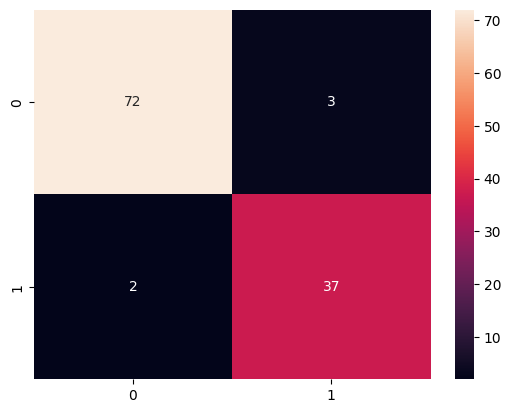

In [158]:
sns.heatmap(cm, annot=True)

# Test without Feature Selection
If there's no feature selection and standscaler, the result is similar. 
But it could not clearly evaluated in this case because the dataset is small 

In [171]:

X = df.drop(['id', 'diagnosis'], axis =1)
y = df.diagnosis
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
pipe0 = Pipeline([
    # ('scaler', StandardScaler()), 
    ('model', LogisticRegression(max_iter=50))
    ])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        76
           1       0.92      0.95      0.94        38

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Implement TransformerMixin

In [185]:
from sklearn.base import BaseEstimator, TransformerMixin

In [186]:
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns # columns to drop
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_transformed = X.drop(columns=self.columns)
        return X_transformed

In [188]:
pipeline = Pipeline([
    ('column_dropper', DropColumnsTransformer(columns=corr_col_list)),
    ('scaler', StandardScaler()),  # Example preprocessing step
    ('classifier', RandomForestClassifier())  # Example classifier
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9736842105263158